In [497]:
%pylab notebook
import numpy as np
import scipy as sp
from scipy.linalg import circulant
import itertools
import os
figpath="./figures/"
!mkdir $figpath

Populating the interactive namespace from numpy and matplotlib
mkdir: ./figures/: File exists


In [499]:
N=50 ; p=0.02 ; Amp=1000.
x=np.linspace(-1.,1.,N) ; y=np.linspace(-1.,1.,N) ; h=np.mean(x[1:]-x[:-1]) 
V0=1.e4 ; V=np.zeros((N,N),float)

In [500]:
nx=arange(N)
zidx=[t for t in itertools.product(nx,nx)]
z=[t for t in itertools.product(x,y)]

In [501]:
# Square well
for i in range(N):
    if x[i]<x[int(ceil(p*N))] or x[i]>=x[N-int(ceil(p*N))]:
        V[i,:]=1.        
    if y[i]<y[int(ceil(p*N))] or y[i]>=y[N-int(ceil(p*N))]:
        V[:,i]=1.
V=Amp*V-Amp

figure()
imshow(V)
colorbar()

/Users/adityarotti/Library/Enthought/Canopy/edm/envs/User/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


In [502]:
# Circular well
rad=0.9
for i in range(N):
    for j in range(N):
        tr=x[i]**2. + y[j]**2
        if tr<=rad:
            V[i,j]=0.
        else:
            V[i,j]=1.
V=Amp*V-Amp

figure()
imshow(V)
colorbar()

In [503]:
# Parabolic well
for i in range(N):
    for j in range(N):
        V[i,j]=(x[i])**2. + (y[j])**2.
V=Amp*V/np.max(V)-Amp

figure()
imshow(V,origin="lower")
colorbar()

In [504]:
# Hexagonal well


Vp=np.zeros((N,N),float)
for i in range(N):
    for j in range(N):
        Vp[i,j]=(x[i])**2. + (y[j])**2.

V=np.zeros((N,N),float)
def hexagon(pos):
    s=0.95
    x, y = map(abs, pos)
    return y < 3**0.5 * min(s - x, s / 2)

for i,tx in enumerate(x):
    for j,ty in enumerate(y):
        if hexagon((tx,ty)):
            V[i,j]=0.
        else:
            V[i,j]=1.
#V=V*Vp
V=Amp*V/np.max(V)-Amp
figure()
imshow(V)
colorbar()

In [505]:
# Generate operator
O=np.zeros((len(z),len(z)),float)
Ov=np.zeros((len(z),len(z)),float)

In [506]:
for i,t1 in enumerate(z):        
    Ov[i,i]=V[zidx[i][0],zidx[i][1]]
    for j,t2 in enumerate(z):
        if np.all(t1==t2):
            O[i,j]=-4./h/h
        if t1[0]!=t2[0] and t1[1]!=t2[1]:
            O[i,j]=0
        elif abs(abs(t1[0]-t2[0])/h-1.)<1.e-10:
            O[i,j]=1./h/h
        elif abs(abs(t1[1]-t2[1])/h-1.)<1.e-10:
            O[i,j]=1./h/h

In [507]:
Ov=np.zeros((len(z),len(z)),float)
for i,t1 in enumerate(z):        
    Ov[i,i]=V[zidx[i][0],zidx[i][1]]

In [508]:
figure()
imshow(-O,origin="True")
colorbar()

In [509]:
En,vec=np.linalg.eigh(-O+Ov)

In [511]:
ioff()
for idx in range(40):
    vis_vec=np.zeros((N,N),float)
    for i,t1 in enumerate(z):        
        vis_vec[zidx[i][0],zidx[i][1]]=vec[i,idx]
    
    figure()
    imshow(vis_vec,origin="lower")
    title("E" + str(idx) + "=" +str(round(En[idx],3)))
    colorbar()
    savefig(figpath + "hexagonal_well_eigenstate" + str(idx).zfill(2) + ".jpeg")
    
workdir=os.getcwd()
os.chdir(figpath)
cmd="convert -quality 99 -density 150 -delay 120 -loop 0 hexagonal_well_eigenstate*.jpeg hexagonal_well_eigen_movie.gif"
os.system(cmd)
os.system("rm *.jpeg")
os.chdir(workdir)

<IPython.core.display.Javascript object>


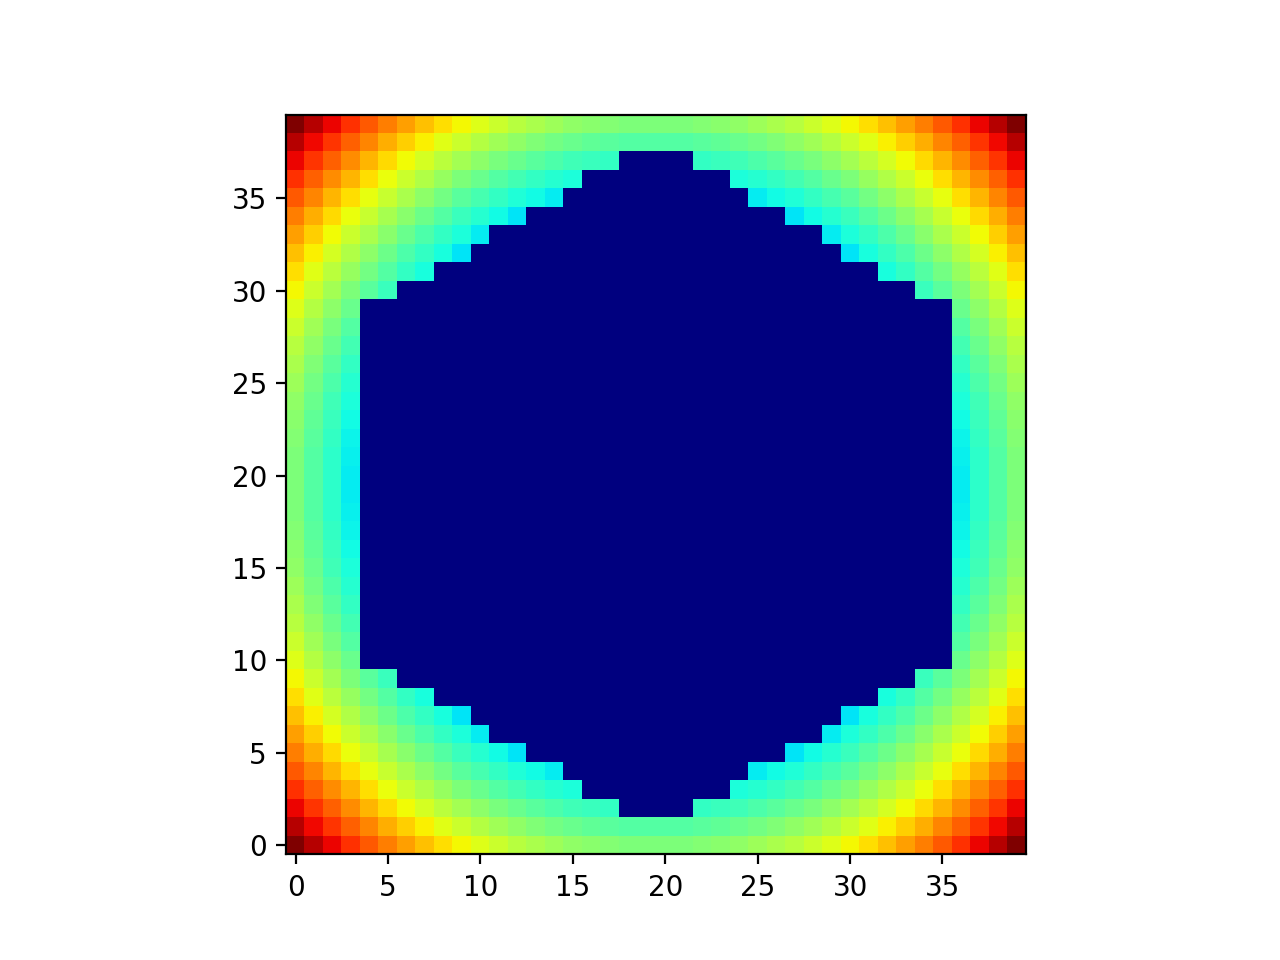

In [385]:
tV=np.zeros((N,N),float)
for i,t1 in enumerate(z):        
    tV[zidx[i][0],zidx[i][1]]=Ov[i,i]
    
figure()
imshow(tV,origin="lower")

In [512]:
np.linalg.eigh?